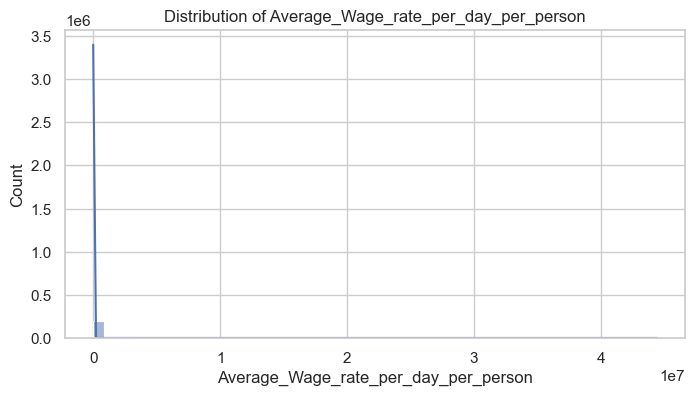

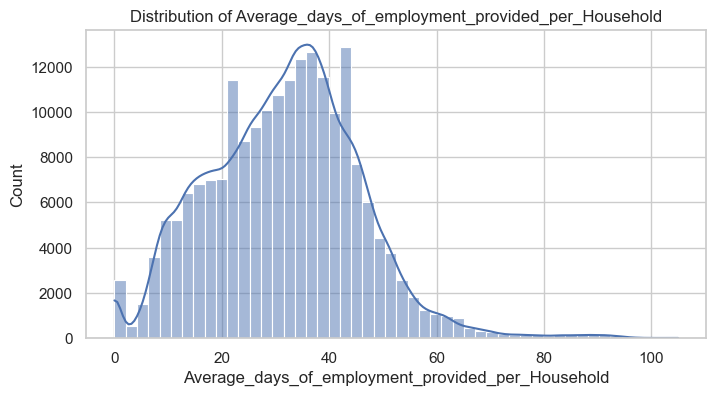

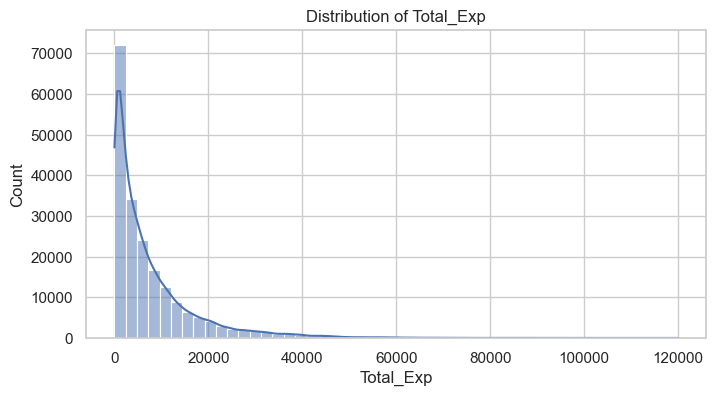

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load data
df = pd.read_csv(r"D:\dataset\Distdata.csv")

# 1️⃣ Histogram + KDE
cols = ['Average_Wage_rate_per_day_per_person', 'Average_days_of_employment_provided_per_Household', 'Total_Exp']
for col in cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col].dropna(), kde=True, bins=50)
    plt.title(f'Distribution of {col}')
    plt.show()

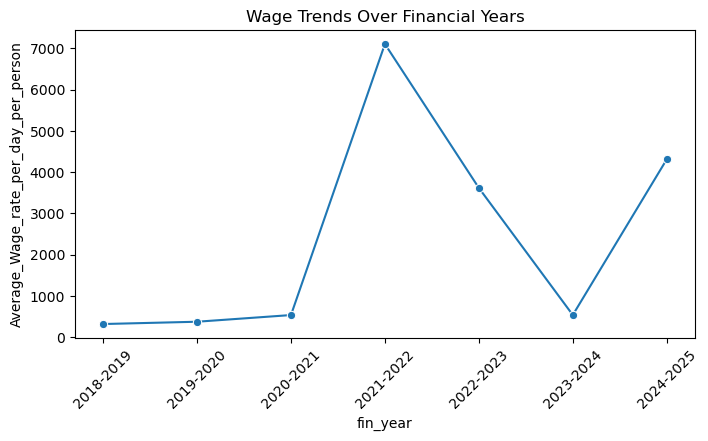

In [43]:
trend = df.groupby('fin_year')['Average_Wage_rate_per_day_per_person'].mean().reset_index()
plt.figure(figsize=(8, 4))
sns.lineplot(data=trend, x='fin_year', y='Average_Wage_rate_per_day_per_person', marker='o')
plt.title('Wage Trends Over Financial Years')
plt.xticks(rotation=45)
plt.show()


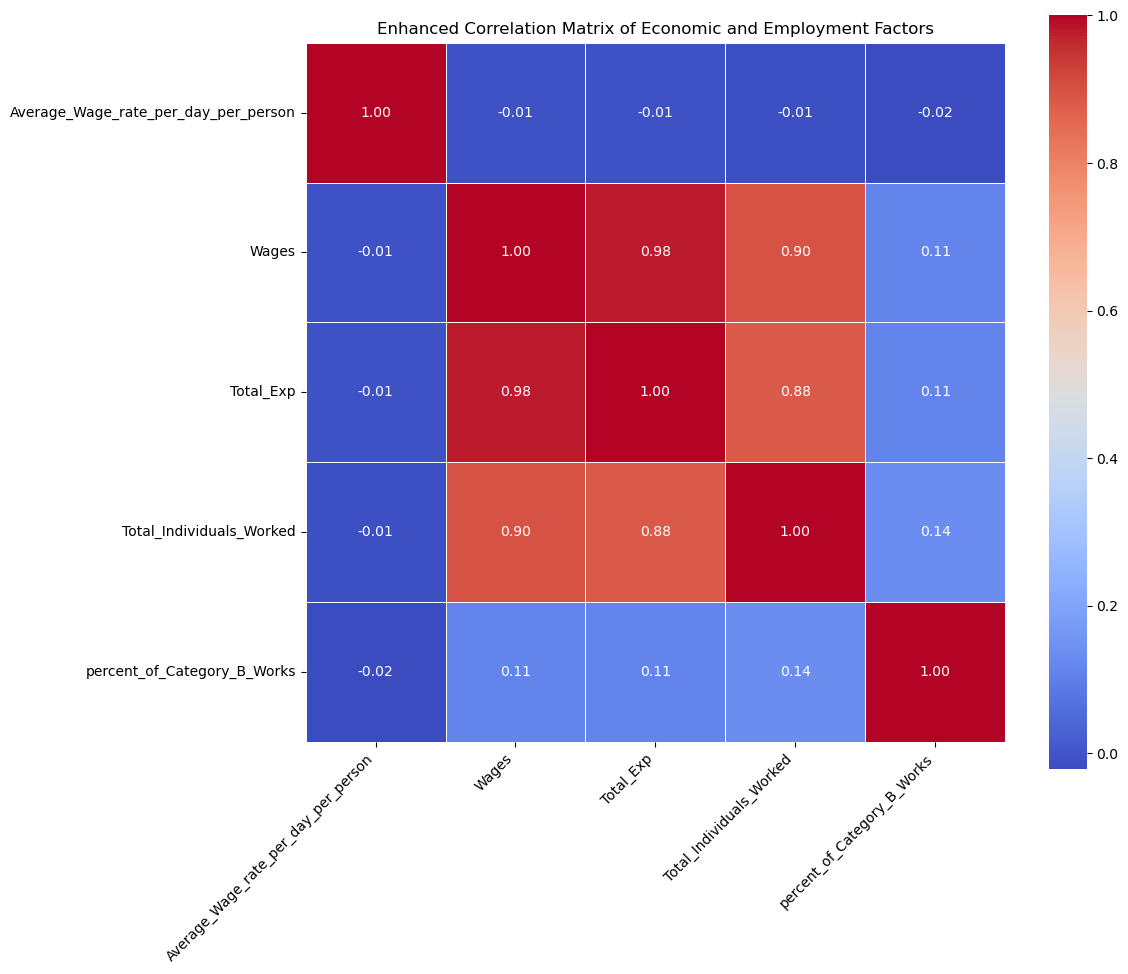

In [44]:
# Select relevant numerical columns including more dimensions
num_cols = [
    'Average_Wage_rate_per_day_per_person',
    'Wages',
    'Total_Exp',
    'Total_Individuals_Worked',
    'No_of_Households_Completed',
    'No_of_Households_Registered',
    'persondays_generated_total',
    'persondays_generated_women',
    'percent_of_Category_B_Works'
]

# Filter out columns that might not exist to avoid KeyErrors
num_cols = [col for col in num_cols if col in df.columns]

# Plot enhanced heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df[num_cols].corr(), annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5, square=True)
plt.title('Enhanced Correlation Matrix of Economic and Employment Factors')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


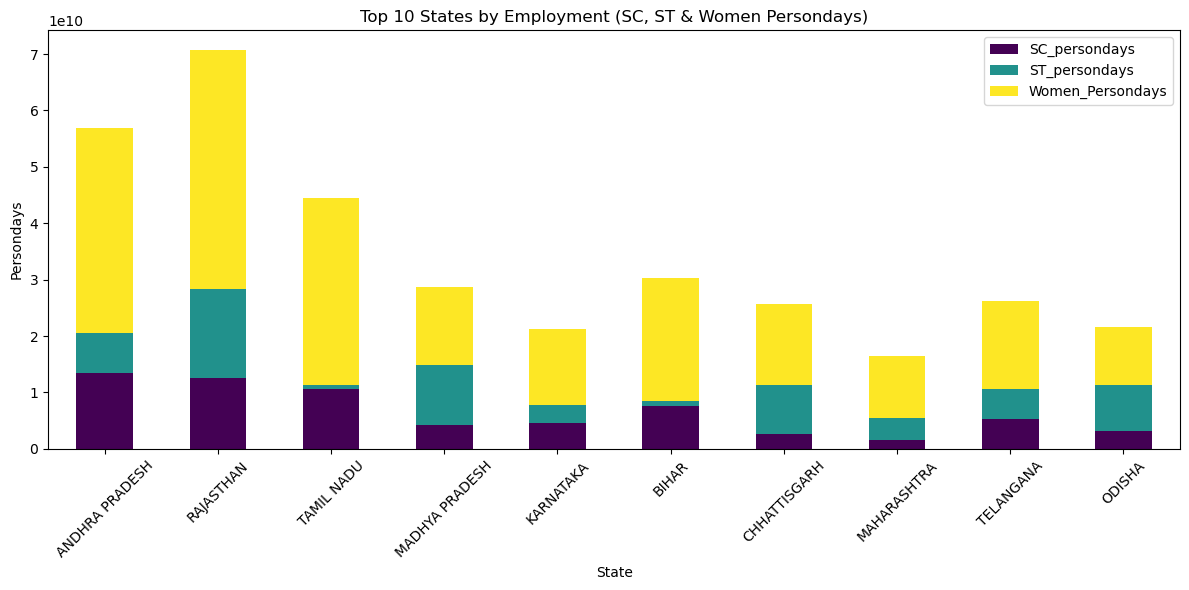

In [45]:
# Aggregate key demographic data
grouped = df.groupby('state_name')[['SC_persondays', 'ST_persondays', 'Women_Persondays', 'Total_Individuals_Worked']].sum()
top_states = grouped.sort_values('Total_Individuals_Worked', ascending=False).head(10)

# Plot
top_states[['SC_persondays', 'ST_persondays', 'Women_Persondays']].plot(
    kind='bar', stacked=True, figsize=(12, 6), colormap='viridis'
)
plt.title("Top 10 States by Employment (SC, ST & Women Persondays)")
plt.xlabel("State")
plt.ylabel("Persondays")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


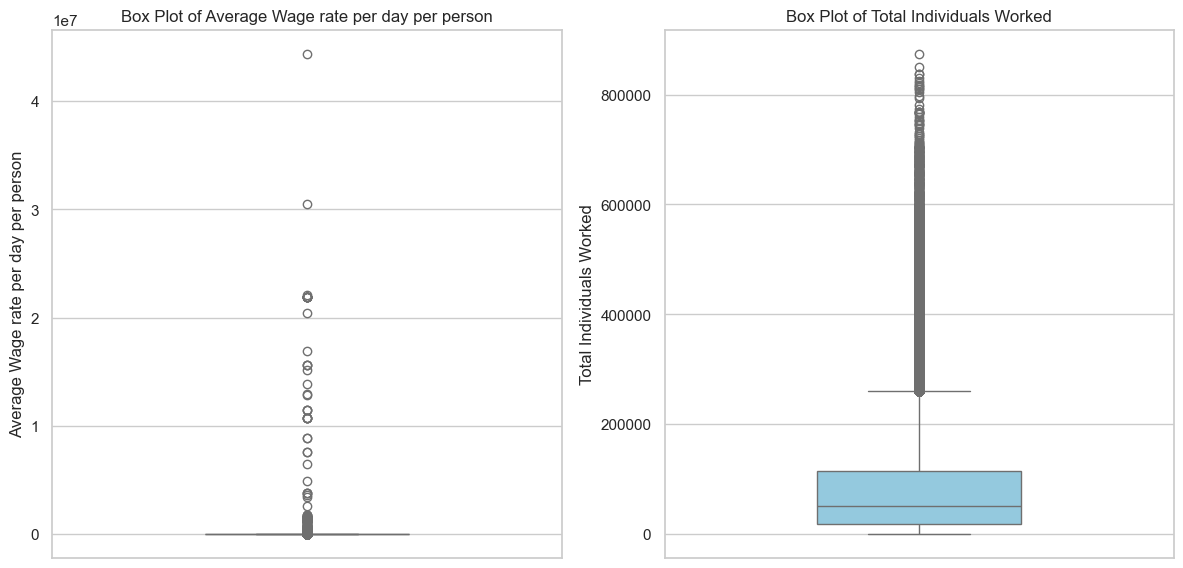

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a clean style
sns.set(style="whitegrid")

# Select columns to visualize
cols_to_plot = ['Average_Wage_rate_per_day_per_person', 'Total_Individuals_Worked']

plt.figure(figsize=(12, 6))

for i, col in enumerate(cols_to_plot, 1):
    plt.subplot(1, 2, i)
    sns.boxplot(y=df[col], color='skyblue', width=0.4)
    plt.title(f'Box Plot of {col.replace("_", " ")}')
    plt.ylabel(col.replace("_", " "))
    plt.xlabel('')

plt.tight_layout()
plt.show()



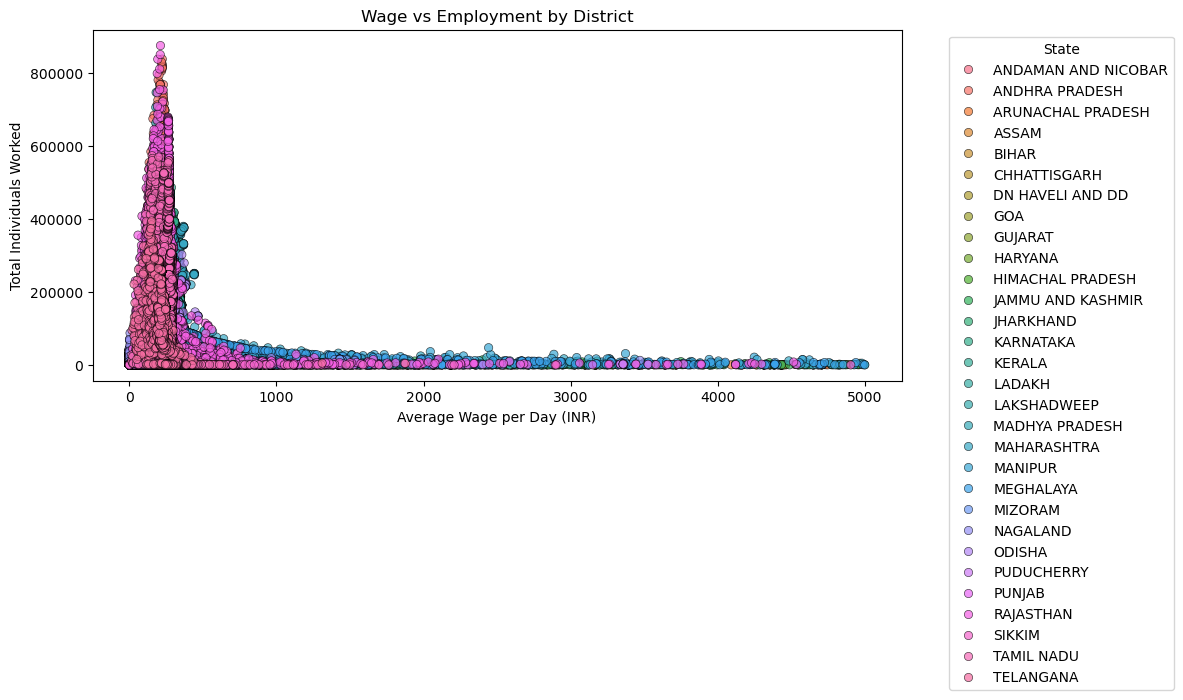

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=df_filtered,
    x='Average_Wage_rate_per_day_per_person',
    y='Total_Individuals_Worked',
    hue='state_name',
    palette='husl',
    alpha=0.7,
    edgecolor='black'
)

plt.title('Wage vs Employment by District')
plt.xlabel('Average Wage per Day (INR)')
plt.ylabel('Total Individuals Worked')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='State')
plt.tight_layout()
plt.show()


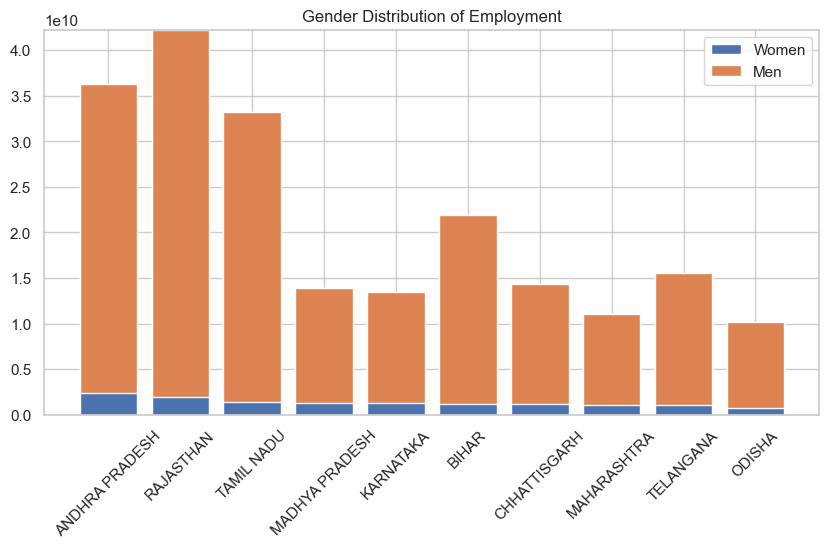

In [6]:
gender = df.groupby('state_name')[['Women_Persondays', 'Total_Individuals_Worked']].sum().reset_index()
gender['Men'] = gender['Total_Individuals_Worked'] - gender['Women_Persondays']
gender_top = gender.nlargest(10, 'Total_Individuals_Worked')

plt.figure(figsize=(10, 5))
plt.bar(gender_top['state_name'], gender_top['Women_Persondays'], label='Women')
plt.bar(gender_top['state_name'], gender_top['Men'], bottom=gender_top['Women_Persondays'], label='Men')
plt.title('Gender Distribution of Employment')
plt.xticks(rotation=45)
plt.legend()
plt.show()                 